In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [41]:
# init lists for storing iteration id & training loss

# Cityscapes
iter_v1_cityscapes = []
loss_v1_cityscapes = []

iter_v2_cityscapes = []
loss_v2_cityscapes = []

iter_stdc_cityscapes = []
loss_stdc_cityscapes = []

# PascalVOC
iter_v1_voc = []
loss_v1_voc = []

iter_v2_voc = []
loss_v2_voc = []

iter_stdc_voc = []
loss_stdc_voc = []

In [42]:
# read CSVs to lists
import csv

# Citycapes
with open('v1_cityscapes.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v1_cityscapes.append(int(row[0]))
        loss_v1_cityscapes.append(float(row[3]))

with open('v2_cityscapes.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v2_cityscapes.append(int(row[0]))
        loss_v2_cityscapes.append(float(row[3]))
        
with open('stdc2_cityscapes.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_stdc_cityscapes.append(int(row[0]))
        loss_stdc_cityscapes.append(float(row[3]))

# PascalVOC        
with open('v1_voc.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v1_voc.append(int(row[0]))
        loss_v1_voc.append(float(row[3]))
        
with open('v2_voc.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v2_voc.append(int(row[0]))
        loss_v2_voc.append(float(row[3]))
        
with open('stdc2_voc.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_stdc_voc.append(int(row[0]))
        loss_stdc_voc.append(float(row[3]))

In [43]:
# data smoothing algorithms
import numpy as np

# moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# savgol_filter
from scipy.signal import savgol_filter

In [63]:
# smooth data by moving average
MA_windows_size = 301  # set window size

# run moving average on iteration id & training loss

# Cityscapes
MA_iter_v1_cityscapes = moving_average(iter_v1_cityscapes, MA_windows_size)
MA_loss_v1_cityscapes = moving_average(loss_v1_cityscapes, MA_windows_size)

MA_iter_v2_cityscapes = moving_average(iter_v2_cityscapes, MA_windows_size)
MA_loss_v2_cityscapes = moving_average(loss_v2_cityscapes, MA_windows_size)

MA_iter_stdc_cityscapes = moving_average(iter_stdc_cityscapes, MA_windows_size)
#MA_loss_stdc_cityscapes = moving_average(loss_stdc_cityscapes, MA_windows_size)

# PascalVOC
MA_iter_v1_voc = moving_average(iter_v1_voc, MA_windows_size)
MA_loss_v1_voc = moving_average(loss_v1_voc, MA_windows_size)

MA_iter_v2_voc = moving_average(iter_v2_voc, MA_windows_size)
MA_loss_v2_voc = moving_average(loss_v2_voc, MA_windows_size)

MA_iter_stdc_voc = moving_average(iter_stdc_voc, MA_windows_size)
#MA_loss_stdc_voc = moving_average(loss_stdc_voc, MA_windows_size)

In [119]:
# smooth data by savgol_fiter
SAV_window_size = 301  # set window size
SAV_poly_order = 1  # set polynomial order

# run savgol fiter on training loss

# Cityscapes
SAV_loss_v1_cityscapes = savgol_filter(loss_v1_cityscapes, SAV_window_size, SAV_poly_order)
SAV_loss_v2_cityscapes = savgol_filter(loss_v2_cityscapes, SAV_window_size, SAV_poly_order)
#SAV_loss_stdc_cityscapes = savgol_filter(loss_stdc_cityscapes, SAV_window_size, SAV_poly_order)

# PascalVOC
SAV_loss_v1_voc = savgol_filter(loss_v1_voc, SAV_window_size, SAV_poly_order)
SAV_loss_v2_voc = savgol_filter(loss_v2_voc, SAV_window_size, SAV_poly_order)
#SAV_loss_stdc_voc = savgol_filter(loss_stdc_voc, SAV_window_size_2, SAV_poly_order)

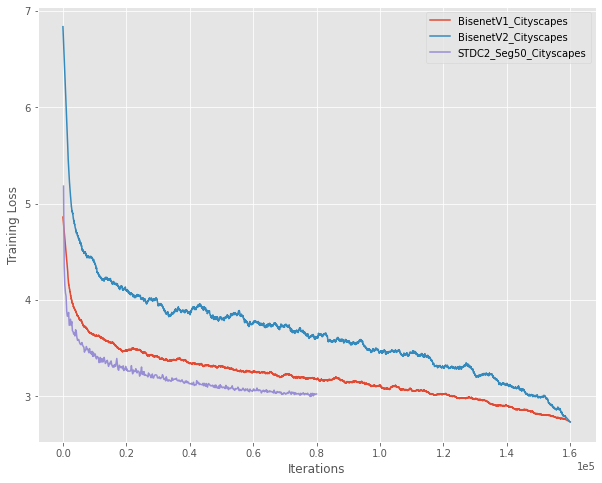

In [120]:
# plot Cityscapes results with data smoothed by savgol_filter
plt.figure(figsize=(10, 8))
plt.plot(iter_v1_cityscapes, SAV_loss_v1_cityscapes, label = 'BisenetV1_Cityscapes')
plt.plot(iter_v2_cityscapes, SAV_loss_v2_cityscapes, label = 'BisenetV2_Cityscapes')
plt.plot(iter_stdc_cityscapes, loss_stdc_cityscapes, label = 'STDC2_Seg50_Cityscapes')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.savefig('Train_Loss_Cityscapes_Ord1.pdf')
plt.show()

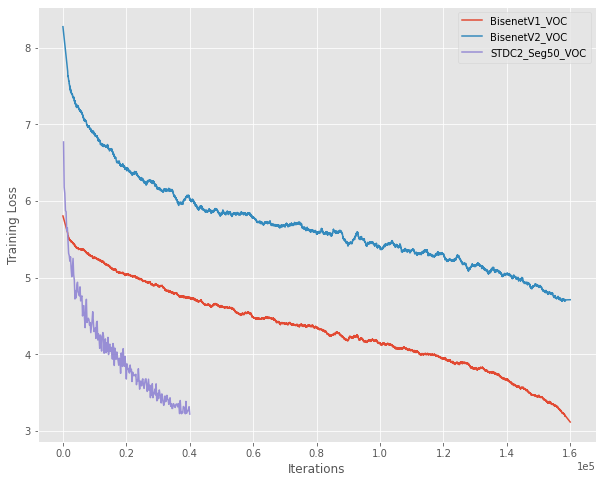

In [121]:
# plot PascalVOC results with data smoothed by savgol_filter
plt.figure(figsize=(10, 8))
plt.plot(iter_v1_voc, SAV_loss_v1_voc, label = 'BisenetV1_VOC')
plt.plot(iter_v2_voc, SAV_loss_v2_voc, label = 'BisenetV2_VOC')
plt.plot(iter_stdc_voc, loss_stdc_voc, label = 'STDC2_Seg50_VOC')


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.savefig('Train_Loss_VOC_Ord1.pdf')
plt.show()

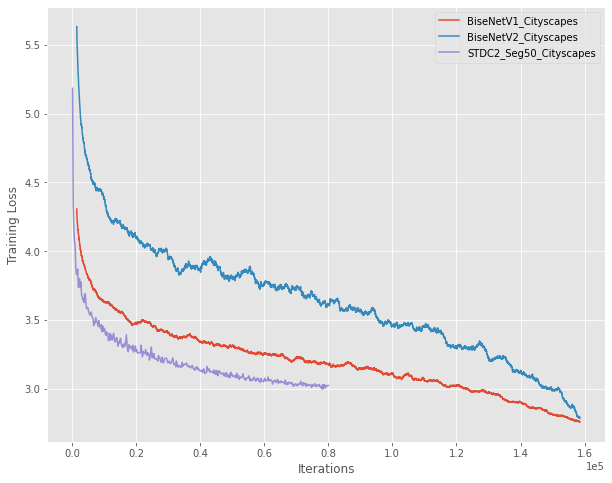

In [107]:
# plot results with data smoothed by moving average
# plt.figure(figsize=(10, 8))
# plt.plot(MA_iter_v1_cityscapes,MA_loss_v1_cityscapes, label = 'BiseNetV1_Cityscapes')
# plt.plot(MA_iter_v2_cityscapes,MA_loss_v2_cityscapes, label = 'BiseNetV2_Cityscapes')
# #plt.plot(MA_iter_stdc_cityscapes,MA_loss_stdc_cityscapes, label = 'STDC2_Seg50_Cityscapes')
# plt.plot(iter_stdc_cityscapes,loss_stdc_cityscapes, label = 'STDC2_Seg50_Cityscapes')

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xlabel('Iterations')
# plt.ylabel('Training Loss')
# plt.legend()
# plt.show()